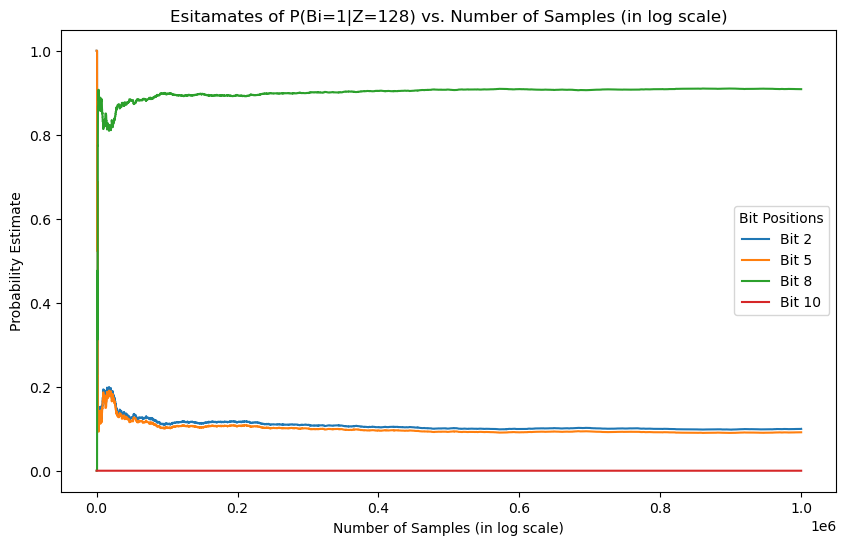

Bit 2 Probability: 0.09958606545197954
Bit 5 Probability: 0.09151633873316779
Bit 8 Probability: 0.9084836612668145
Bit 10 Probability: 0.0


In [1]:
import random
import matplotlib.pyplot as plt

def simulate_likelihood_weighting(samples_count, interval, noise_factor, target_value):
    bit_weights = {2: 0, 5: 0, 8: 0, 10: 0}
    probability_estimates = {2: [], 5: [], 8: [], 10: []}
    accumulated_weight = 0
    
    for iteration in range(1, samples_count + 1):
        binary_vars = [random.choice([0, 1]) for _ in range(10)]
        decimal_val = sum(b << i for i, b in enumerate(binary_vars))
        likelihood_weight = ((1 - noise_factor) / (1 + noise_factor)) * noise_factor ** abs(target_value - decimal_val)
        accumulated_weight += likelihood_weight
        
        for position in bit_weights.keys():
            bit_weights[position] += likelihood_weight * binary_vars[position - 1]
            if iteration % interval == 0:
                probability_estimates[position].append(bit_weights[position] / accumulated_weight)
    
    return probability_estimates

total_samples = 1000000
sample_interval = 100
alpha = 0.1
Z = 128
sampling_points = [sample_interval * i for i in range(total_samples // sample_interval)]

estimates = simulate_likelihood_weighting(total_samples, sample_interval, alpha, Z)

plt.figure(figsize=(10, 6))

for bit_position in estimates.keys():
    plt.plot(sampling_points, estimates[bit_position], label=f'Bit {bit_position}')

plt.xlabel('Number of Samples (in log scale)')
plt.ylabel('Probability Estimate')
plt.legend(title='Bit Positions')
plt.title('Esitamates of P(Bi=1|Z=128) vs. Number of Samples (in log scale)')
plt.show()

for bit_position in estimates.keys():
    print(f"Bit {bit_position} Probability: {estimates[bit_position][-1]}")